![alt text](img/LM.png)
# Kurs: Warsztaty Machine Learning w Pythonie

## Prowadzący: Piotr Ćwiakowski

## Autorzy: Piotr Ćwiakowski, Maciej Wilamowski

### Lekcja 7. Naive Bayes

#### Spis treści:

1. Opis algorytmu.  
2. Naive Bayes w Pythonie.

#  1. Opis algorytmu

## 1.1. Wprowadzenie
Kiedy stosowaliśmy regesję logistyczną w problemie klasyfikacji binarnej problem jaki był stawiany przed modelem to optymalizacja wag, przy założeniu, że prawdopodobieńśtwo zdarzenia dane jest wzorem:

$$ p = \dfrac{1}{1+e^{-(\beta_0+\beta_1 * x_1+\beta_2 * x_2+\beta_3 * x_3+...)}}$$

W ten sposób parametry były estymowane łącznie. Oznacza to, że w sytuacji w której wartości poszczególnych zmiennych $x_i$ są zależnośc, to jest ona uwzględniana w procesie estymacji. Może to czasami rodzić problemy, jeżeli występuje wiele skorelowanych zmiennych w interpretacji parametrów oraz w samych oszacowaniach.

W przypadku algorytmu Naive Bayes, jak sama nazwa wskazuje stosuje się odmienne, naiwne podejście, gdzie zakładamy niezależność. W przypadku większości "prawdziwych" zbiorów danych założenie to zwykle nie jest spelnione. W większości przypadków w dzisiejszym świecie nasyconym danymi będziemy mieli do dyspozycji wiele obserwacji oraz wiele zmiennych, często w grupach skorelowanych zmiennych. Większość to jednak nie wszystko. Co jakiś czas możemy stanąć przed problemem, gdzie będziemy zmuszeni do stworzenia predykcyjnego modelu w oparciu o "mały" zbiór danych, gdzie liczba obserwacji to dziesiątki lub setki, a zmienne objasniające można policzyć na palcach.

W takiej sytuacji może się okazać, że Naive Bayes będzie lepszym rozwiązaniem. 

## 1.2. Naive Bayes dla zmiennych dyskretnych.
Ogólne założenie dotyczace prawdopodobieństwa mówi, że możemy wyrazić prawdopodobieństwo zaobserwowania wartości $y$ pod warunkiem obserwowania wartości $X$.
$$P(y \mid x_1, \dots, x_n) = \frac{P(y) P(x_1, \dots x_n \mid y)} {P(x_1, \dots, x_n)}$$

Wyrażenie to wprost czerpie ze wzoru ze statystyki bayesowskiej:  

<img src="img/nb_1.png" width="60%" align="center">  

Gdzie:  
A - założenia przyjęte przed badaniem  
D|A – prawdopodobieństwo zaobserwowania próby pod warunkiem, że A jest prawdziwe  
D – rozkład prawdopodobieństwa zaobserwowania zdarzenia D w próbie (czynnik normalizacyjny)  

Przenalizujmy prosty przykład. Załóżmy, że mamy zbiór maili i chcemy wnioskować na podstawie słów w nich zawartych, które z nich to spam, a które nie (te drugie nazywane są ham). Załóżmy następujący rozkład:

<center><img src="img/nb_2.png" width="60%"></center>

Możemy teraz policzyć prawdopodobieństwo, że wiadomość to spam:

<center><img src="img/nb_3.png" width="60%"></center>

Co jeśli zmiennych jest bardzo wiele? Wzór bardzo się komplikuje. Jednak skoro wprowadzamy założenie o niezależności zmiennych to możemy uprosicić wzór na prawdopodobieństwo poziomu $x_i$ tak by było zalezne wyłącznie od poziomu y.

$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y),$$

W konsekwencji prawdopodobieństwo obserwowania poziomu $y$ pod warunkiem obserwowania wektora $X$ możemy wyrazić wzorem.

$$P(y \mid x_1, \dots, x_n) = \frac{P(y) \prod_{i=1}^{n} P(x_i \mid y)}{P(x_1, \dots, x_n)}$$

Wyrażenie, które obserwujemy w mianowniku jest stałe i niezależne od $y$. Nie musimy się więc nim zajmować przy estymowaniu zależności pomiędzy $X$ a $y$. W związku z tym możemy estymować prawdopodobieństwo metodą Maximum a Posteriori (MAP), gdzie przez obserwację poziomów $x_i$ względem poziomów $y$ oszacujemy $P(x_i \mid y)$ dla każdej zmiennej.

W praktyce oznacza to, że dla każdej zmiennej/słowa tworzymy osobną tabelkę krzyżowa, w której liczymy prawdopodobieństwo $a posteriori$ a następnie wymnażając przez siebie p-stwa z kolejnych kolumn.

## 1.3 Szacowanie prawdopodobieństw dla zmiennych ciągłych
Pozostaje więc pytanie jak możemy oszacować prawdopodobieństwa $P(x_i \mid y)$ obserwując zbiór treningowy. Odpowiedni wzór będzie zależał od charakteru zmiennej. Dla zmiennych binarnych wykorzystamy wyrażenie podobne do funkcji straty cross entropy:

$$P(x_i \mid y) = P(i \mid y) x_i + (1 - P(i \mid y)) (1 - x_i)$$

Chociaż wygląda to skomplikowanie to sprowadza się do udziału dwóch poziomów zmiennej $y$ zalezżie od poziomu binarnej zmiennej $x_i$.

W przypadku zmiennych ciągłych , szczególnie na małych zbiorach, nie będziemy mogli łatwo wyznaczyć prawdopodobieństwa numerycznie. W związku z tym zwykle w Naive Bayes zakłada się pewną postać funkcyjną (podejście parametryczne). Będziemy zakładać, że prawdopodobieństwo zaobserwowania wartości zmiennej ciągłej $x_i$ jest reprezentowane funkcją gaussowską:

$$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$

Ostatni, z najczęściej spotykanych przypadków to sytuacja w której chcemy estymować prawdopodobieństwo dla wielu klas, gdzie zmienne objaśniające są binarne lub stanowią liczebności (jak np. liczba wystąpień danego słowa w tekście). W tym przypadku stosuje się poniższe założenie:

$$\hat{\theta}_{yi} = \frac{ N_{yi} + \alpha}{N_y + \alpha n}$$

gdzie: $\hat{\theta}_{yi}$ to przybliżenie prawdopodobieństwa wystąpienia danej zmiennej (np. słowa) pod warunkiem że obserwowany jest jakiś poziom klasy zmiennej $y$. Jest liczone jako iloraz łącznej liczby wystąpień zmiennej $x_i$ dla danego poziomu klasy $y$ do łącznej liczby wystąpień wszystkich zmiennych.  Parafrazując, na przykładzie słów w tekstach, procentowy udział liczby wystąpień jednego slowa w danej klasie, do liczby wszystkich słów w obserwacjach danej klasy. Parametr $\alpha$ słuzy do wygładzania prawdopodobieństw i ma zapobiegać sytuacji w której, kiedy jakieś słowo nie pojawi się w danej klasie przypisane zostanie mu prawdopodobieńśtwo zerowe. $n$ to liczba zmiennych (unikatowych słów). Zwykle $\alpha$ jest równa lub mniejsza niż 1.

## 1.4 Podsumowanie
Warto na początku zauważyć, że nie omówiliśmy przypadku w którym część zmiennych jest binarna a pozostałe są ciągłe. W standardowej bibliotece Pythona w scikit-learn przypadek mixed bayes nie jest zaimplementowany. W mieszanym przypadku część prawdopodobieństw liczona jest z użyciem Bernouliego (zmienne binarne) a pozostałe Gaussowskiego (zmienne ciągłe). Istnieją niezależne implementacje takiego rozwiązania (np. https://github.com/remykarem/mixed-naive-bayes).

Pamiętajmy, ze z matematycznego punktu widzenia zmienna binarna może zostać potraktowana jak szczególny przypadek zmiennej ciągłej, a zmienne ciągłe możemy binaryzować przez wybór punktu odcięcia dla 0 i 1.

Naive Bayes nie jest algorytmem idealnym. Co więcej jest algorytmem dobrym wyłącznie w wąskich zastosowaniach. Jedną z istotnych konsekwencji założenia o niezalezności i prostej metodzie szacowania prawdopodobieńśtw jest fakt, iż Naive Bayes jest czasami dobrym klasyfikatorem, ale zwykle nie estymatorem. Szacowane wartości prawdopodobieńśtwa nie będą zbliżone do prawdziwych wartości. W sytuacji w której chcielibyśmy stosować estymowane prawdopodobieństwa do optymalizacji biznesowej prawdopodonie regresja logistyczna będzie bardziej pomocna. Najczęstszym zastosowaniem tego algorytmu jest klasyfikacja tekstów w problemie wieloklasowym. Algortym jest również bardzo przydatny jeśli mamy bardzo dużo zmiennych i relatywnie niewiele wierszy (np. 1000 zmiennych i 5000 wierszy).

# 2. Naive Bayes w Pythonie
Popularność algorytmu Naive Bayes jest względnie niewielka, poniżej skoncentrujemy się wyłącznie na ilustracji prostej implementacji.

## 2.1. Przygotowanie danych i środowiska

In [1]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
from sklearn import metrics
import matplotlib.pyplot as plt

plt.style.use('seaborn-ticks')
%matplotlib inline

In [2]:
df_o = pd.read_csv("data/bank-balanced.csv")
print(df_o.shape)
df_o.head()

(11162, 17)


age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [3]:
df_o.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [4]:
target = "deposit"

In [5]:
numFeatures = ['age', 'balance', 'duration', 'campaign', 'pdays','previous', 'day']

In [6]:
catFeatures = [ 'job', 'marital', 'education', 'default',  'housing', 'loan', 'contact',  'month', 'poutcome']

In [7]:
# One hot encoding
dummLev = pd.get_dummies(df_o[catFeatures], drop_first=True)

# Połączenie zmiennych numerycznych, kategorycznych w postaci on hot encoding oraz targetu
df = pd.concat([df_o[numFeatures], dummLev, df_o[[target]]], axis=1)

In [8]:
df.shape

(11162, 43)

In [9]:
df.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'deposit'],
      dtype='object')

In [10]:
df[target].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [11]:
features = df.columns.tolist()
features.remove(target)
print(features)

['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


## 2.2. Walidacja pierwszego modelu

In [12]:
# Wczytanie potrzebnych bibliotek
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

# Przygotujmy wrapper
def CVTestNBGaussian(nFolds = 5, randomState=2020, debug=False, *args, **kwargs):
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    # Lista z wynikami
    testResults = []
    trainResults = []
    predictions = []
    indices = []
    
    # Pętla walidująca model na kolejnych foldach
    for train, test in kf.split(df.index.values):
        # Przygotowanie estymatora
        clf = GaussianNB(*args, **kwargs)
        if debug:
            print(clf)
        # Trenowanie modelu
        clf.fit(df.iloc[train][features], df.iloc[train][target])

        # Przygotowanie prognoz dla zbioru treningowego i testowego
        # UWAGA Sklearn zwracał będzie dwie kolumny prawdopodobieństw dla obydwu klas
        predsTrain = clf.predict_proba(df.iloc[train][features])[:,1]
        preds = clf.predict_proba(df.iloc[test][features])[:,1]
        
        # Zachowajmy informacje o predykcjach dla tego foldu
        predictions.append(preds.tolist().copy())
        
        # Razem z indeksami w oryginalnym data frame
        indices.append(df.iloc[test].index.tolist().copy())
        
        # Policzenie ROC-AUC dla foldów
        trainScore = roc_auc_score((df[target].iloc[train]=="yes").astype(int), predsTrain)
        testScore = roc_auc_score((df[target].iloc[test]=="yes").astype(int), preds)
        
        # Zapisanie wyników dla foldów
        trainResults.append(trainScore)
        testResults.append(testScore)
        
        # Informowanie o każdym foldzie razem z wynikami treningowymi możemy opcjonalnie wyświetlać w trakcie
        if debug:
            print("Train AUC:", trainScore,
                  "Valid AUC:", testScore)
        
    return trainResults, testResults, predictions, indices

In [15]:
trainResults, testResults, predictions, indices = CVTestNBGaussian(debug=True)
print(np.mean(testResults))

GaussianNB(priors=None, var_smoothing=1e-09)
Train AUC: 0.8236412976464945 Valid AUC: 0.8313747322789987
GaussianNB(priors=None, var_smoothing=1e-09)
Train AUC: 0.8207281743710331 Valid AUC: 0.8241425859828928
GaussianNB(priors=None, var_smoothing=1e-09)
Train AUC: 0.8204240616691065 Valid AUC: 0.8245100789162142
GaussianNB(priors=None, var_smoothing=1e-09)
Train AUC: 0.8242181335631426 Valid AUC: 0.8094884331297375
GaussianNB(priors=None, var_smoothing=1e-09)
Train AUC: 0.8210804457456959 Valid AUC: 0.811172770100629
0.8201377200816944


In [16]:
trainResults, testResults, predictions, indices = CVTestNBGaussian(debug=True)
print(np.mean(testResults))

GaussianNB(priors=None, var_smoothing=1e-09)
Train AUC: 0.8236412976464945 Valid AUC: 0.8313747322789987
GaussianNB(priors=None, var_smoothing=1e-09)
Train AUC: 0.8207281743710331 Valid AUC: 0.8241425859828928
GaussianNB(priors=None, var_smoothing=1e-09)
Train AUC: 0.8204240616691065 Valid AUC: 0.8245100789162142
GaussianNB(priors=None, var_smoothing=1e-09)
Train AUC: 0.8242181335631426 Valid AUC: 0.8094884331297375
GaussianNB(priors=None, var_smoothing=1e-09)
Train AUC: 0.8210804457456959 Valid AUC: 0.811172770100629
0.8201377200816944


Jak widać proste i bezpośrednie wykorzystanie algorytmu nie daje najlepszych wyników na naszym zbiorze. Możemy zobaczyć czy uda nam się zmienić sytuację wybierając tylko część zmiennych.

In [17]:
features = ['duration', 'balance', 'pdays',
'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown']
trainResults, testResults, predictions, indices = CVTestNBGaussian(debug=True)
print(np.mean(testResults))

GaussianNB(priors=None, var_smoothing=1e-09)
Train AUC: 0.8403052214171362 Valid AUC: 0.8420815639244645
GaussianNB(priors=None, var_smoothing=1e-09)
Train AUC: 0.8376542934775446 Valid AUC: 0.8506860761083234
GaussianNB(priors=None, var_smoothing=1e-09)
Train AUC: 0.8348404412723874 Valid AUC: 0.8480599663567295
GaussianNB(priors=None, var_smoothing=1e-09)
Train AUC: 0.8414836631185293 Valid AUC: 0.8244796845340324
GaussianNB(priors=None, var_smoothing=1e-09)
Train AUC: 0.8403298901928222 Valid AUC: 0.8254627446713334
0.8381540071189766


Jak widać prosta selekcja zmiennych pozwoliła minimalnie poprawić wynik, ale dalej uzyskujemy oszacowanie znacznie słabsze od wcześniejszych wyników. Zobaczmy jak wygląda krzywa ROC.

In [18]:
modelNB = {
    "name":"NB",
    "description":"Prosty ,odel Naive Bayes",
    "specification":'',
    "trainResults":trainResults.copy(),
    "testResults":testResults.copy(),
    "predictions":predictions.copy(),
    "indices":indices.copy(),
}

In [19]:
with open("model_ekonometria_1.p", "rb") as fp:
    modelEkonometria = pickle.load(fp)


In [21]:
from helpers import plotROCs

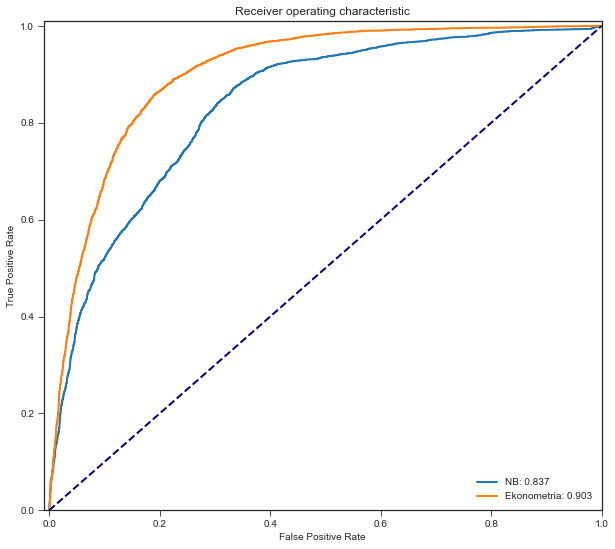

In [22]:
res2plot = []
true = (df[target]=="yes").astype(int).sort_index()
for result in [modelNB, modelEkonometria]:
    # Tworzymy wektor predykcji tworząc serię pandasa, a następnie sortujemy indeks
    pred = pd.Series(sum(result["predictions"], []), index=sum(result["indices"], [])).sort_index()
    res2plot.append((true, pred, result["name"]))
    
# Wywołujemy funkcję do rysowania
plotROCs(res2plot)

Powyższy rysunek pokazuje co to znaczy, że Naive bayes nie jest najlepszym estymatorem nawet jeżeli nie jest najgorszym klasyfikatorem. Uzyskana krzywa nie jest mocno wklęsła jak to ma miejsce w przypadku większości estymatorów. Miejscami nawet przestaje być wklęsła. To znaczy, że nie porządkuje dobrze klasyfikacji w przypadku "wątpliwych" obserwacji. Nawet jeżeli możemy uzyskać bardzo zbliżone predykcje do modelu ekonometrycznego dla niektórych progów odcięcia.